 Is there a correlation between a player's BMI and their ranking? 

In [6]:
import pandas as pd


away_team_score = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\away_team_score.csv')
away_team = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\away_team.csv')
event = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\event.csv')
home_team_score = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\home_team_score.csv')
home_team = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\home_team.csv')
raw_odds_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_odds_parquet.csv')
raw_point_by_point_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_point_by_point_parquet.csv')
raw_statistics_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_statistics_parquet.csv')
raw_tennis_power_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_tennis_power_parquet.csv')
raw_votes_parquet = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\raw_votes_parquet.csv')
round = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\round.csv')
season = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\season.csv')
time = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\time.csv')
tournament = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\tournament.csv')
venue = pd.read_csv('E:\\daneshkar\\Tennis Schema\\output\\csv output\\venue.csv')


In [7]:
home_team = home_team[['match_id', 'full_name', 'current_rank' , 'weight' , 'height']]

away_team = away_team[['match_id', 'full_name', 'current_rank' , 'weight' , 'height']]

concat_home_away = pd.concat([home_team , away_team] , ignore_index=True)

concat_home_away = concat_home_away.dropna()

concat_home_away['weight'] = pd.to_numeric(concat_home_away['weight'], errors='coerce')
concat_home_away['height'] = pd.to_numeric(concat_home_away['height'], errors='coerce')



concat_home_away['BMI'] = concat_home_away['weight'] / concat_home_away['height'] ** 2

concat_home_away


,match_id,full_name,current_rank,weight,height,BMI
1,11998446,"Lestienne, Constant",99.0,72.0,1.80,22.222222
2,11998447,"Ćorić, Borna",31.0,85.0,1.88,24.049344
3,11998448,"Mmoh, Michael",122.0,90.0,1.88,25.464011
4,11998449,"Paire, Benoit",110.0,80.0,1.96,20.824656
5,11998450,"Shapovalov, Denis",120.0,75.0,1.85,21.913806
...,...,...,...,...,...,...
24061,12212077,"Masarova, Rebeka",83.0,71.0,1.86,20.522604
24062,12212078,"Dodin, Océane",77.0,58.0,1.83,17.319120
24071,12212207,"Ribero, Franco",1087.0,82.0,1.88,23.200543
24074,12212216,"Doria, Luciano",1442.0,78.0,1.80,24.074074


In [8]:
concat_home_away = concat_home_away.groupby(['full_name' , 'BMI'])['current_rank'].mean().reset_index()

concat_home_away = concat_home_away.rename(columns={'current_rank': 'Avv_rank'})

concat_home_away = concat_home_away[['full_name', 'Avv_rank' , 'BMI']]

concat_home_away = concat_home_away.sort_values( by = 'Avv_rank' , ascending= True) 

concat_home_away = concat_home_away.head(20)



In [9]:
concat_home_away = concat_home_away.sort_values( by = 'Avv_rank' , ascending= False) 

concat_home_away['Avv_rank'] = concat_home_away['Avv_rank'].astype(int)

concat_home_away['Avv_rank'] = concat_home_away['Avv_rank'].astype(str)


concat_home_away['name and rank'] = concat_home_away['full_name'] + '=' + concat_home_away['Avv_rank']



concat_home_away

,full_name,Avv_rank,BMI,name and rank
221,"Haddad Maia, Beatriz",13,22.790358,"Haddad Maia, Beatriz=13"
275,"Kasatkina, Daria",12,21.453287,"Kasatkina, Daria=12"
133,"Dimitrov, Grigor",11,22.203339,"Dimitrov, Grigor=11"
589,"Tsitsipas, Stefanos",10,22.819405,"Tsitsipas, Stefanos=10"
184,"Fritz, Taylor",10,22.386506,"Fritz, Taylor=10"
651,"de Minaur, Alex",10,20.603780,"de Minaur, Alex=10"
441,"Ostapenko, Jelena",9,21.705129,"Ostapenko, Jelena=9"
509,"Ruud, Casper",9,22.992624,"Ruud, Casper=9"
518,"Sakkari, Maria",8,20.957274,"Sakkari, Maria=8"
250,"Hurkacz, Hubert",8,21.084965,"Hurkacz, Hubert=8"


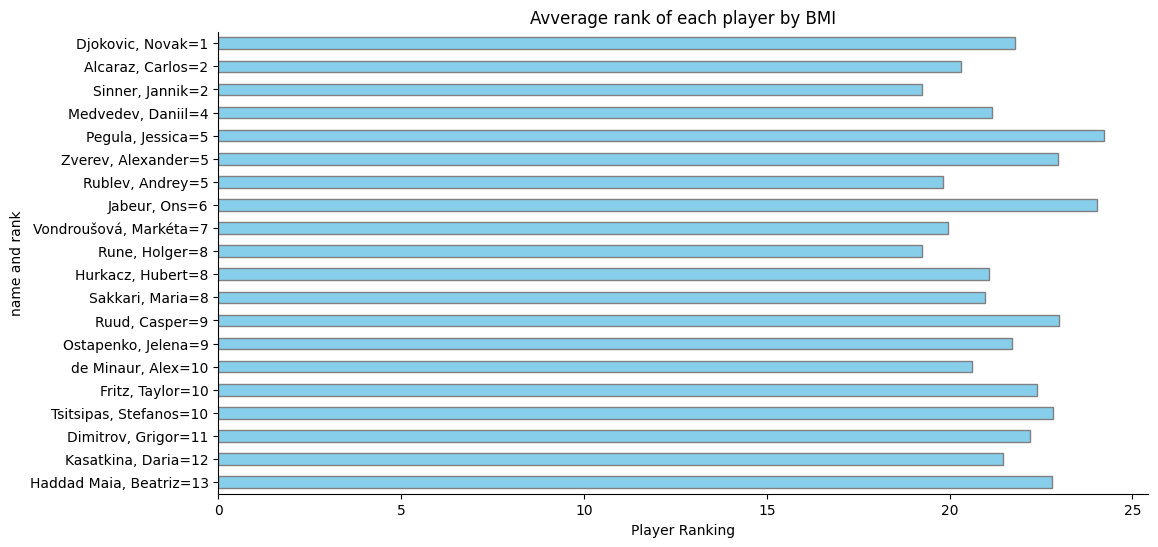

In [10]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(figsize=(12, 6))
concat_home_away.plot(kind='barh', x='name and rank', y='BMI', ax=ax, color='skyblue' , edgecolor = 'gray'  , legend= False)
ax.set_title('Avverage rank of each player by BMI')
ax.set_xlabel('Player Ranking') 

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)